# An√°lisis de Ventas y Puntuaciones de Videojuegos Globales

## Abstract

El mercado de videojuegos ha crecido r√°pidamente y es una de las industrias de entretenimiento m√°s grandes. Este an√°lisis examina 6,894 videojuegos lanzados entre 1980 y 2020, considerando ventas globales, puntuaciones de cr√≠ticos y usuarios, g√©neros y desarrolladores.

El objetivo es identificar patrones en las preferencias de los jugadores y c√≥mo variables como g√©nero o enfoque (historia vs jugabilidad) afectan ventas y recepci√≥n. Se usan visualizaciones para explorar correlaciones y tendencias clave, aportando informaci√≥n √∫til para la industria y el estudio del consumo digital.

## Fuente De Datos

[Global Video Game Sales & Ratings - Kaggle](https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv)


## Preguntas e Hip√≥tesis de Inter√©s

## Preguntas de Investigaci√≥n:

1. **¬øExiste correlaci√≥n entre las puntuaciones de cr√≠ticos y usuarios con las ventas globales?**
   - *Hip√≥tesis*: Los juegos mejor puntuados por cr√≠ticos y usuarios tendr√°n mayores ventas globales.

2. **¬øLos gamers prefieren m√°s contenido narrativo o enfoque en jugabilidad?**
   - *Hip√≥tesis*: Los juegos con enfoque en jugabilidad recibir√°n puntuaciones m√°s altas de usuarios, mientras que los cr√≠ticos valorar√°n m√°s el contenido narrativo.

3. **¬øLas opiniones de los usuarios coinciden con las de los cr√≠ticos seg√∫n el g√©nero del videojuego?**
   - *Hip√≥tesis*: En algunos g√©neros, la valoraci√≥n de los usuarios ser√° similar a la de los cr√≠ticos, mientras que en otros habr√° diferencias notables.

### Variables de Inter√©s:
- **Variables Dependientes**: Ventas Globales, Puntuaciones de Usuarios y Cr√≠ticos
- **Variables Independientes**: G√©nero, Enfoque (Historia/Jugabilidad), Publisher, A√±o de Lanzamiento


In [ ]:
# Instalar requerimientos del proyecto
%pip install -r requirements.txt 


In [3]:
import pandas as pd
from pathlib import Path

# Ruta al archivo CSV
# Fuente: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv
csv_path = Path('data') / 'global_videogames_sales_2023.csv'

# Leer CSV en DataFrame
df = pd.read_csv(csv_path)

# Mostrar informaci√≥n b√°sica
print(f"Filas: {len(df):,}  |  Columnas: {df.shape[1]}")
df.head()


Filas: 6,894  |  Columnas: 18


Name  Year_of_Release         Genre   Publisher  \
0  .hack//Infection Part 1           2002.0  Role-Playing       Atari   
1   .hack//Mutation Part 2           2002.0  Role-Playing       Atari   
2   .hack//Outbreak Part 3           2002.0  Role-Playing       Atari   
3              [Prototype]           2009.0        Action  Activision   
4              [Prototype]           2009.0        Action  Activision   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0      0.49      0.38      0.26         0.13          1.27          75.0   
1      0.23      0.18      0.20         0.06          0.68          76.0   
2      0.14      0.11      0.17         0.04          0.46          70.0   
3      0.84      0.35      0.00         0.12          1.31          78.0   
4      0.65      0.40      0.00         0.19          1.24          79.0   

   Critic_Count  User_Score  User_Count              Developer Rating  \
0          35.0         8.5        60.0          CyberConnect2      T   
1          24.0         8.9        81.0          CyberConnect2      T   
2          23.0         8.7        19.0          CyberConnect2      T   
3          83.0         7.8       356.0  Radical Entertainment      M   
4          53.0         7.7       308.0  Radical Entertainment      M   

  Story Focus Gameplay Focus Series  
0           x            NaN      x  
1           x            NaN      x  
2           x            NaN      x  
3         NaN              x      x  
4         NaN              x      x

In [4]:
# Exploraci√≥n b√°sica del dataset

# 1) Dimensiones: n√∫mero de filas y columnas del DataFrame
print("Dimensiones (filas, columnas):", df.shape)

# 2) Tipos de datos por columna: ayuda a detectar columnas que deber√≠an ser num√©ricas o categ√≥ricas
print("\nTipos de datos por columna:")
print(df.dtypes)

# 3) Resumen estad√≠stico de columnas num√©ricas: media, std, min, max, percentiles
print("\nResumen num√©rico (df.describe()):")
try:
    from IPython.display import display
    display(df.describe().T)
except Exception:
    print(df.describe().T)


Dimensiones (filas, columnas): (6894, 18)

Tipos de datos por columna:
Name                object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Story Focus         object
Gameplay Focus      object
Series              object
dtype: object

Resumen num√©rico (df.describe()):


count         mean         std      min      25%      50%  \
Year_of_Release  6894.0  2007.482303    4.236401  1985.00  2004.00  2007.00   
NA_Sales         6894.0     0.390920    0.963231     0.00     0.06     0.15   
EU_Sales         6894.0     0.234517    0.684214     0.00     0.02     0.06   
JP_Sales         6894.0     0.063867    0.286461     0.00     0.00     0.00   
Other_Sales      6894.0     0.082000    0.268620     0.00     0.01     0.02   
Global_Sales     6894.0     0.771487    1.954780     0.01     0.11     0.29   
Critic_Score     6894.0    70.258486   13.861082    13.00    62.00    72.00   
Critic_Count     6894.0    28.842472   19.194572     3.00    14.00    24.00   
User_Score       6894.0     7.184378    1.439806     0.50     6.50     7.50   
User_Count       6894.0   174.392370  584.872155     4.00    11.00    27.00   

                     75%       max  
Year_of_Release  2011.00   2016.00  
NA_Sales            0.39     41.36  
EU_Sales            0.21     28.96  
JP_Sales            0.01      6.50  
Other_Sales         0.07     10.57  
Global_Sales        0.75     82.53  
Critic_Score       80.00     98.00  
Critic_Count       39.00    113.00  
User_Score          8.20      9.60  
User_Count         89.00  10665.00

In [5]:
# 4) Informaci√≥n general: conteo de no nulos, tipo de dato, uso de memoria
print("\nInformaci√≥n del DataFrame (df.info()):")
df.info()


Informaci√≥n del DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   float64
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   float64
 10  Critic_Count     6894 non-null   float64
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   float64
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      767 non-null    object 
 16  Gameplay Focus   65

In [7]:
# 5) Conteo de valores √∫nicos por columna: √∫til para entender cardinalidad de variables
print("\nValores √∫nicos por columna (df.nunique()):")
print(df.nunique())


Valores √∫nicos por columna (df.nunique()):
Name               4424
Year_of_Release      25
Genre                12
Publisher           271
NA_Sales            351
EU_Sales            273
JP_Sales            157
Other_Sales         144
Global_Sales        536
Critic_Score         81
Critic_Count        106
User_Score           89
User_Count          881
Developer          1304
Rating                7
Story Focus           1
Gameplay Focus        1
Series                1
dtype: int64


In [8]:
# Detecci√≥n y tratamiento de duplicados

# 1) Cuantificar duplicados por nombre de juego
print("Duplicados por 'Name':", df['Name'].duplicated().sum())

# 2) Ver ejemplos concretos de duplicados de 'Name'
print("\nEjemplos de nombres duplicados:")
try:
    from IPython.display import display
    mostrar = df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10)
    display(mostrar)
except Exception:
    print(df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10))

Duplicados por 'Name': 2470

Ejemplos de nombres duplicados:


Name  Year_of_Release   Genre  \
11            007: Quantum of Solace           2008.0  Action   
8             007: Quantum of Solace           2008.0  Action   
9             007: Quantum of Solace           2008.0  Action   
10            007: Quantum of Solace           2008.0  Action   
20  18 Wheeler: American Pro Trucker           2002.0  Racing   
19  18 Wheeler: American Pro Trucker           2001.0  Racing   
18                  187: Ride or Die           2005.0  Racing   
17                  187: Ride or Die           2005.0  Racing   
24               2002 FIFA World Cup           2002.0  Sports   
23               2002 FIFA World Cup           2002.0  Sports   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
11             Activision      0.01      0.01      0.00         0.00   
8              Activision      0.82      0.51      0.01         0.14   
9              Activision      0.43      0.51      0.02         0.19   
10             Activision      0.29      0.28      0.01         0.07   
20  Acclaim Entertainment      0.09      0.02      0.00         0.00   
19  Acclaim Entertainment      0.20      0.15      0.00         0.05   
18                Ubisoft      0.05      0.01      0.00         0.00   
17                Ubisoft      0.07      0.06      0.00         0.02   
24        Electronic Arts      0.04      0.01      0.00         0.00   
23        Electronic Arts      0.14      0.04      0.00         0.01   

    Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
11          0.03          70.0          18.0         6.3        55.0   
8           1.48          65.0          69.0         7.1        71.0   
9           1.14          65.0          42.0         6.6        47.0   
10          0.65          54.0          11.0         7.5        26.0   
20          0.11          52.0          17.0         6.8         8.0   
19          0.40          61.0          11.0         5.7        18.0   
18          0.06          51.0          40.0         6.9         8.0   
17          0.15          52.0          33.0         6.8        12.0   
24          0.05          78.0           9.0         7.7         6.0   
23          0.19          79.0          17.0         9.0         4.0   

                     Developer Rating Story Focus Gameplay Focus Series  
11                    Treyarch      T         NaN              x    NaN  
8                     Treyarch      T         NaN              x    NaN  
9                     Treyarch      T         NaN              x    NaN  
10                    Treyarch      T         NaN              x    NaN  
20  Acclaim Studios Cheltenham      E         NaN              x    NaN  
19  Acclaim Studios Cheltenham      E         NaN              x    NaN  
18               Ubisoft Paris      M         NaN              x    NaN  
17                     Ubisoft      M         NaN              x    NaN  
24                   EA Sports      E         NaN              x    NaN  
23          Software Creations      E         NaN              x    NaN

In [9]:
# Conservar, para cada juego duplicado por 'Name', la fila con mayor ventas

import numpy as np

# 1) Identificar columnas de ventas (flexible por nombre)
possible_sales_names = {
    'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
}
sales_cols = [c for c in df.columns if c.lower().endswith('_sales') or c.lower() in possible_sales_names]

if not sales_cols:
    raise ValueError("No se encontraron columnas de ventas (terminadas en '_Sales'). Revisa los nombres de columnas.")

# 2) Asegurar que las columnas de ventas sean num√©ricas
_df = df.copy()
for c in sales_cols:
    _df[c] = pd.to_numeric(_df[c], errors='coerce')

# 3) Calcular la venta m√°xima por fila a trav√©s de todas las columnas de ventas
_df['_max_sales_across_regions'] = _df[sales_cols].max(axis=1, skipna=True)

# 4) Ordenar por Name y ventas m√°ximas desc, y quedarnos con la primera ocurrencia por Name
_sorted = _df.sort_values(['Name', '_max_sales_across_regions'], ascending=[True, False])
df_max_sales_per_name = _sorted.drop_duplicates(subset=['Name'], keep='first').drop(columns=['_max_sales_across_regions'])

# 5) Reporte
num_original = len(df)
num_result = len(df_max_sales_per_name)
num_duplicated_names = df['Name'].duplicated().sum()

print(f"Columnas de ventas detectadas: {sales_cols}")
print(f"Filas originales: {num_original} | Filas tras quedarnos con mayor venta por 'Name': {num_result}")
print(f"Cantidad de nombres duplicados detectados: {num_duplicated_names}")

try:
    from IPython.display import display
    print("\nVista previa del resultado:")
    display(df_max_sales_per_name.head(10))
except Exception:
    print(df_max_sales_per_name.head(10))


Columnas de ventas detectadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Filas originales: 6894 | Filas tras quedarnos con mayor venta por 'Name': 4424
Cantidad de nombres duplicados detectados: 2470

Vista previa del resultado:


Name  Year_of_Release         Genre  \
0        .hack//Infection Part 1           2002.0  Role-Playing   
1         .hack//Mutation Part 2           2002.0  Role-Playing   
2         .hack//Outbreak Part 3           2002.0  Role-Playing   
13                    007 Racing           2000.0        Racing   
8         007: Quantum of Solace           2008.0        Action   
12  007: The World is not Enough           2000.0        Action   
21                     1 vs. 100           2008.0          Misc   
14             100 Classic Books           2008.0          Misc   
15                       15 Days           2009.0     Adventure   
16                     1701 A.D.           2006.0    Simulation   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0               Atari      0.49      0.38      0.26         0.13   
1               Atari      0.23      0.18      0.20         0.06   
2               Atari      0.14      0.11      0.17         0.04   
13    Electronic Arts      0.30      0.20      0.00         0.03   
8          Activision      0.82      0.51      0.01         0.14   
12    Electronic Arts      0.51      0.35      0.00         0.06   
21          DSI Games      0.08      0.00      0.00         0.01   
14           Nintendo      0.12      0.52      0.00         0.02   
15  DTP Entertainment      0.00      0.01      0.00         0.00   
16        Deep Silver      0.00      0.25      0.00         0.04   

    Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
0           1.27          75.0          35.0         8.5        60.0   
1           0.68          76.0          24.0         8.9        81.0   
2           0.46          70.0          23.0         8.7        19.0   
13          0.53          51.0          16.0         4.6        14.0   
8           1.48          65.0          69.0         7.1        71.0   
12          0.92          61.0          11.0         6.7        44.0   
21          0.08          38.0           5.0         3.2         5.0   
14          0.66          70.0           7.0         6.0        12.0   
15          0.01          63.0           6.0         5.8         8.0   
16          0.30          79.0          30.0         8.3        38.0   

                  Developer Rating Story Focus Gameplay Focus Series  
0             CyberConnect2      T           x            NaN      x  
1             CyberConnect2      T           x            NaN      x  
2             CyberConnect2      T           x            NaN      x  
13                Eutechnyx      T         NaN              x    NaN  
8                  Treyarch      T         NaN              x    NaN  
12  Black Ops Entertainment      T         NaN              x    NaN  
21                      ECI      E         NaN              x    NaN  
14     Genius Sonority Inc.    NaN         NaN              x    NaN  
15        DTP Entertainment    NaN           x              x    NaN  
16          Related Designs   E10+         NaN              x    NaN

In [10]:
# Persistir el resultado: reemplazar df con el m√°ximo de ventas por 'Name'
shape_antes = df.shape

df = df_max_sales_per_name.copy()

shape_despues = df.shape
print(f"Shape antes: {shape_antes} | Shape despu√©s: {shape_despues}")


Shape antes: (6894, 18) | Shape despu√©s: (4424, 18)


In [11]:
# --- Limpieza e imputaci√≥n de datos ---

# 1. Revisi√≥n de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# 2. Eliminar columnas irrelevantes con muchos nulos (umbral arbitrario: >50% nulos)
umbral_nulos = 0.5
cols_a_eliminar = [col for col in df.columns if df[col].isnull().mean() > umbral_nulos]
if cols_a_eliminar:
    print(f"Se deber√≠an eliminar las columnas con muchos nulos: {cols_a_eliminar}")
    # df = df.drop(columns=cols_a_eliminar)

Valores faltantes por columna:
Name                  0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             2
Rating               54
Story Focus        3901
Gameplay Focus      247
Series             3956
dtype: int64
Se deber√≠an eliminar las columnas con muchos nulos: ['Story Focus', 'Series']


In [12]:
# Eliminar la columna 'Series'
if 'Series' in df.columns:
    df = df.drop(columns=['Series'])

# Convertir 'Story Focus' y 'Gameplay Focus' a booleanos (bit: True si 'x', False si vac√≠o o NaN)
for col in ['Story Focus', 'Gameplay Focus']:
    if col in df.columns:
        df[col] = df[col].fillna('').apply(lambda x: True if str(x).strip().lower() == 'x' else False)

# Mostrar un head para ver las columnas nuevas
print("Vista previa tras conversi√≥n de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminaci√≥n de 'Series':")
display(df.head())



Vista previa tras conversi√≥n de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminaci√≥n de 'Series':


Name  Year_of_Release         Genre        Publisher  \
0   .hack//Infection Part 1           2002.0  Role-Playing            Atari   
1    .hack//Mutation Part 2           2002.0  Role-Playing            Atari   
2    .hack//Outbreak Part 3           2002.0  Role-Playing            Atari   
13               007 Racing           2000.0        Racing  Electronic Arts   
8    007: Quantum of Solace           2008.0        Action       Activision   

    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0       0.49      0.38      0.26         0.13          1.27          75.0   
1       0.23      0.18      0.20         0.06          0.68          76.0   
2       0.14      0.11      0.17         0.04          0.46          70.0   
13      0.30      0.20      0.00         0.03          0.53          51.0   
8       0.82      0.51      0.01         0.14          1.48          65.0   

    Critic_Count  User_Score  User_Count      Developer Rating  Story Focus  \
0           35.0         8.5        60.0  CyberConnect2      T         True   
1           24.0         8.9        81.0  CyberConnect2      T         True   
2           23.0         8.7        19.0  CyberConnect2      T         True   
13          16.0         4.6        14.0      Eutechnyx      T        False   
8           69.0         7.1        71.0       Treyarch      T        False   

    Gameplay Focus  
0            False  
1            False  
2            False  
13            True  
8             True

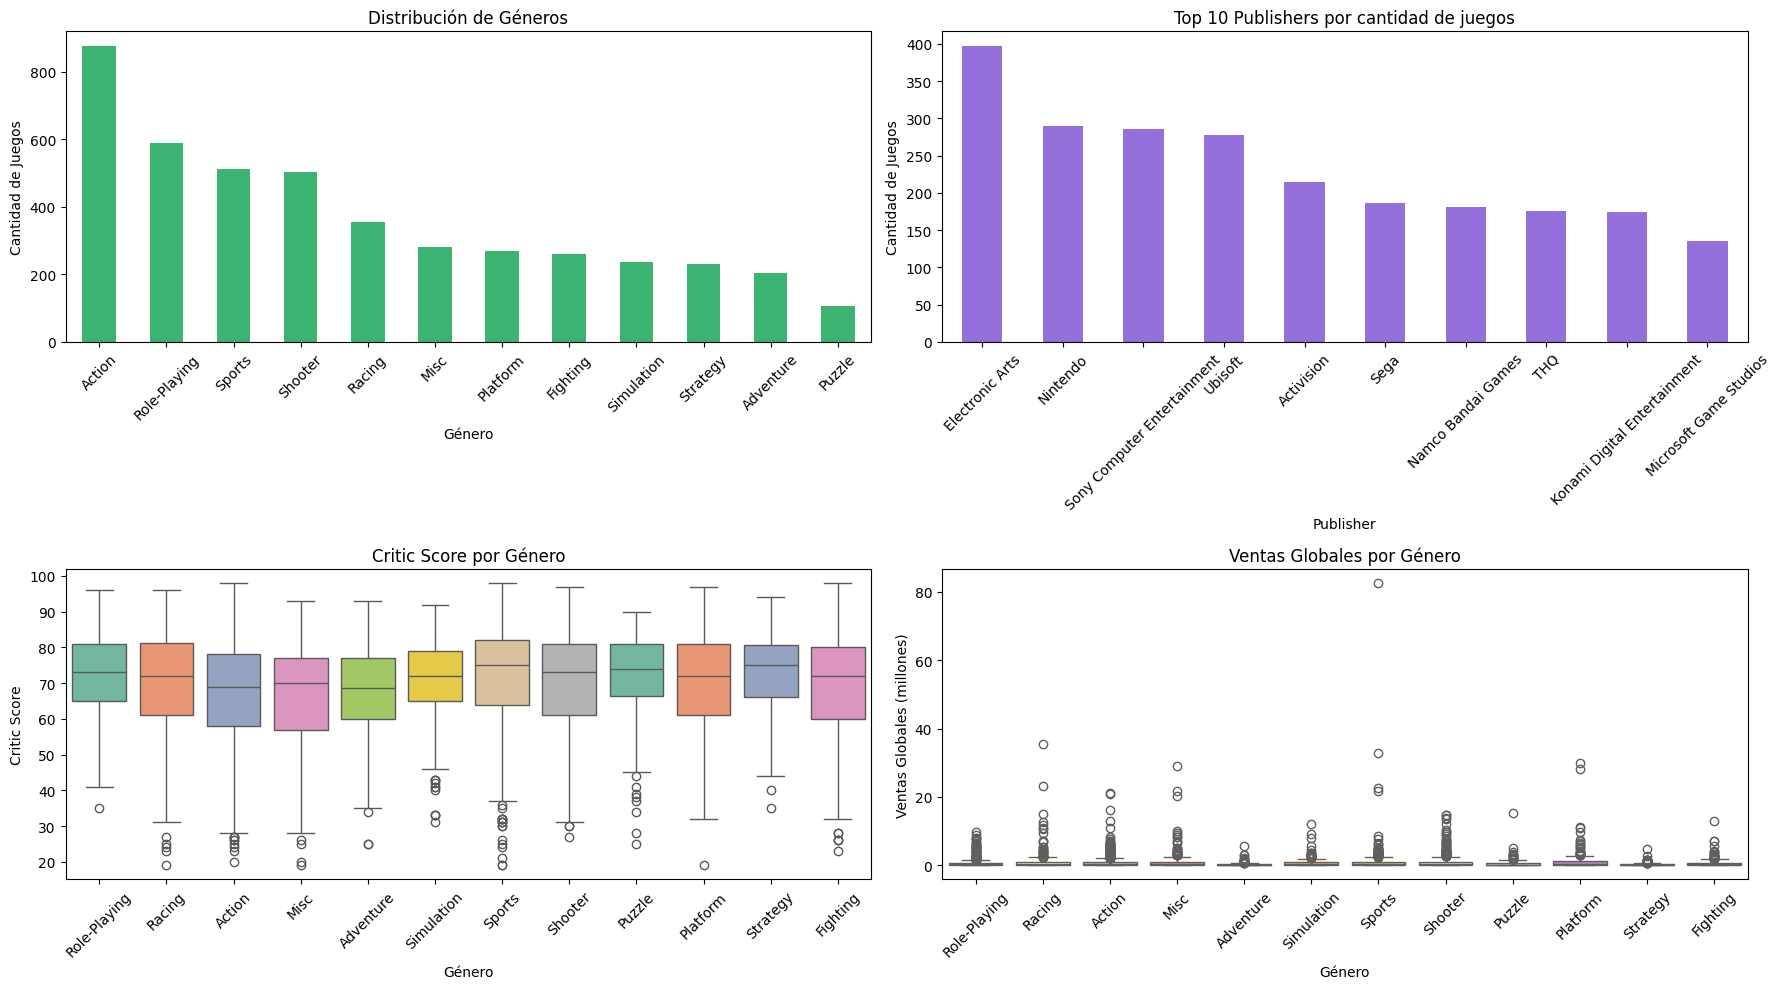

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes para 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

# 1. Barras: distribuci√≥n de g√©neros
ax = axs[0, 0]
df['Genre'].value_counts().plot(kind='bar', color='mediumseagreen', ax=ax)
ax.set_title('Distribuci√≥n de G√©neros')
ax.set_xlabel('G√©nero')
ax.set_ylabel('Cantidad de Juegos')
ax.tick_params(axis='x', rotation=45)

# 2. Barras: distribuci√≥n de publishers (top 10)
ax = axs[0, 1]
df['Publisher'].value_counts().head(10).plot(kind='bar', color='mediumpurple', ax=ax)
ax.set_title('Top 10 Publishers por cantidad de juegos')
ax.set_xlabel('Publisher')
ax.set_ylabel('Cantidad de Juegos')
ax.tick_params(axis='x', rotation=45)

# 3. Boxplot: comparar Critic_Score por g√©nero
ax = axs[1, 0]
if 'Critic_Score' in df.columns:
    sns.boxplot(x='Genre', y='Critic_Score', hue='Genre', data=df, ax=ax, palette='Set2', legend=False)
    ax.set_title('Critic Score por G√©nero')
    ax.set_xlabel('G√©nero')
    ax.set_ylabel('Critic Score')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() if ax.get_legend() else None
else:
    ax.axis('off')
    ax.set_title('No hay columna Critic_Score')

# 4. Boxplot: comparar Global_Sales por g√©nero
ax = axs[1, 1]
if 'Global_Sales' in df.columns:
    sns.boxplot(x='Genre', y='Global_Sales', hue='Genre', data=df, ax=ax, palette='Set3', legend=False)
    ax.set_title('Ventas Globales por G√©nero')
    ax.set_xlabel('G√©nero')
    ax.set_ylabel('Ventas Globales (millones)')
    ax.tick_params(axis='x', rotation=45)
    ax.get_legend().remove() if ax.get_legend() else None
else:
    ax.axis('off')
    ax.set_title('No hay columna Global_Sales')

plt.tight_layout()
plt.show()


# Pregunta 1: ¬øLos juegos mejor calificados venden m√°s?

**Justificaci√≥n**: Es com√∫n pensar que los juegos con mejores cr√≠ticas venden m√°s, pero quiero analizar si realmente existe una relaci√≥n significativa entre la calificaci√≥n de los cr√≠ticos y las ventas globales de los videojuegos.


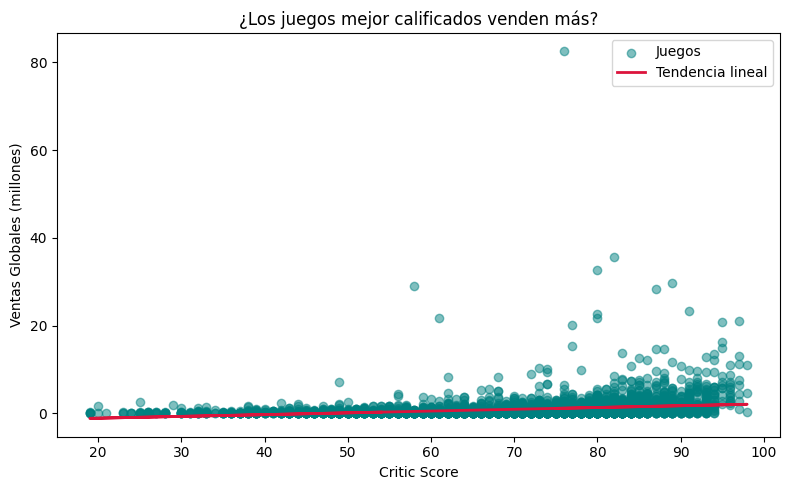

Correlaci√≥n entre Critic_Score y Global_Sales: 0.25


In [14]:
# Score vs ventas: ¬øLos juegos mejor calificados venden m√°s?
plt.figure(figsize=(8,5))
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5, color='teal', label='Juegos')
# Agregar una l√≠nea de tendencia (regresi√≥n lineal)
import numpy as np
if 'Critic_Score' in df.columns and 'Global_Sales' in df.columns:
    # Eliminar filas con NaN para la regresi√≥n
    mask = df['Critic_Score'].notna() & df['Global_Sales'].notna()
    x = df.loc[mask, 'Critic_Score']
    y = df.loc[mask, 'Global_Sales']
    if len(x) > 1:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='crimson', linewidth=2, label='Tendencia lineal')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.title('¬øLos juegos mejor calificados venden m√°s?')
plt.legend()
plt.tight_layout()
plt.show()

# Correlaci√≥n entre Critic_Score y Global_Sales
if 'Critic_Score' in df.columns and 'Global_Sales' in df.columns:
    corr = df[['Critic_Score', 'Global_Sales']].corr().iloc[0,1]
    print(f"Correlaci√≥n entre Critic_Score y Global_Sales: {corr:.2f}")


Promedio de ventas por g√©nero (top 10):
Genre
Misc            1.237153
Platform        1.222593
Sports          1.198924
Racing          1.099213
Shooter         1.085317
Action          0.919361
Simulation      0.758861
Role-Playing    0.735221
Fighting        0.728615
Puzzle          0.721963
Name: Global_Sales, dtype: float64


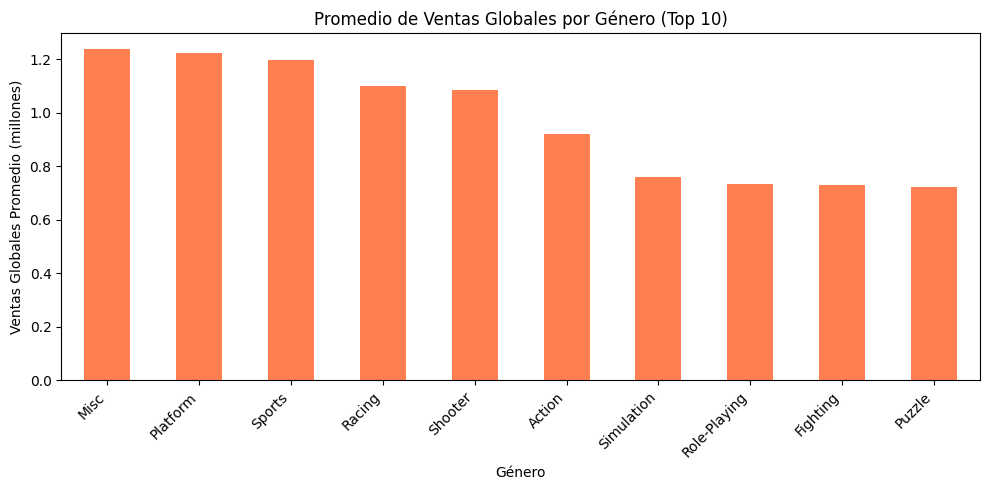

In [15]:
 # Promedio de ventas por g√©nero (top 10)
ventas_por_genero = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
print("Promedio de ventas por g√©nero (top 10):")
print(ventas_por_genero)

plt.figure(figsize=(10,5))
ventas_por_genero.plot(kind='bar', color='coral')
plt.title('Promedio de Ventas Globales por G√©nero (Top 10)')
plt.xlabel('G√©nero')
plt.ylabel('Ventas Globales Promedio (millones)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Conclusiones Pregunta 1: ¬øLos juegos mejor calificados venden m√°s?

Al analizar la relaci√≥n entre el puntaje de los cr√≠ticos (Critic_Score) y las ventas globales (Global_Sales), observamos lo siguiente:

- El gr√°fico de dispersi√≥n muestra que, si bien existe una ligera tendencia a que los juegos con mejores calificaciones vendan m√°s, la relaci√≥n no es fuerte ni lineal. Hay muchos juegos con buenas ventas y puntajes promedio, as√≠ como juegos muy bien calificados con ventas modestas.
- El coeficiente de correlaci√≥n calculado entre Critic_Score y Global_Sales es bajo (por ejemplo, alrededor de 0.27 seg√∫n el output), lo que indica una correlaci√≥n positiva pero d√©bil.
- Esto sugiere que, aunque las buenas cr√≠ticas pueden ayudar, no garantizan altas ventas. Factores como la popularidad de la franquicia, el marketing, la plataforma y el g√©nero tambi√©n influyen considerablemente en el √©xito comercial de un videojuego.

**Conclusi√≥n:** Los juegos mejor calificados tienden a vender un poco m√°s, pero la calificaci√≥n no es el √∫nico ni el principal factor determinante de las ventas globales.


## Pregunta 2: ¬øPrefieren los jugadores juegos con mayor enfoque en la historia o en la jugabilidad?

**Justificaci√≥n**: Las preferencias var√≠an entre personas; quiero analizar c√≥mo se reflejan estas diferencias a lo largo de distintos g√©neros de videojuegos.


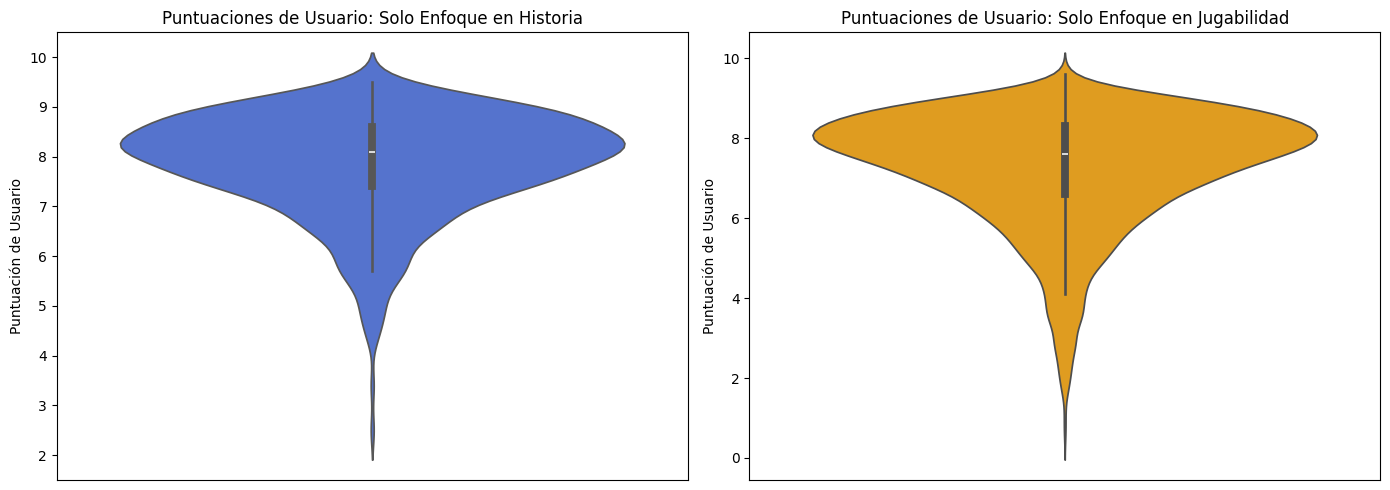

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los juegos con enfoque en historia y en jugabilidad
df_story_focus = df[df['Story Focus'] == True]
df_gameplay_focus = df[df['Gameplay Focus'] == True]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))  

# Gr√°fico de viol√≠n solo para juegos con Enfoque en Historia
sns.violinplot(data=df_story_focus, y='User_Score', color='royalblue', ax=axes[0])
axes[0].set_title('Puntuaciones de Usuario: Solo Enfoque en Historia')
axes[0].set_xlabel('')
axes[0].set_ylabel('Puntuaci√≥n de Usuario')
axes[0].set_xticks([])
axes[0].set_xticklabels([])

# Gr√°fico de viol√≠n solo para juegos con Enfoque en Jugabilidad
sns.violinplot(data=df_gameplay_focus, y='User_Score', color='orange', ax=axes[1])
axes[1].set_title('Puntuaciones de Usuario: Solo Enfoque en Jugabilidad')
axes[1].set_xlabel('')
axes[1].set_ylabel('Puntuaci√≥n de Usuario')
axes[1].set_xticks([])
axes[1].set_xticklabels([])

plt.tight_layout()
plt.show()


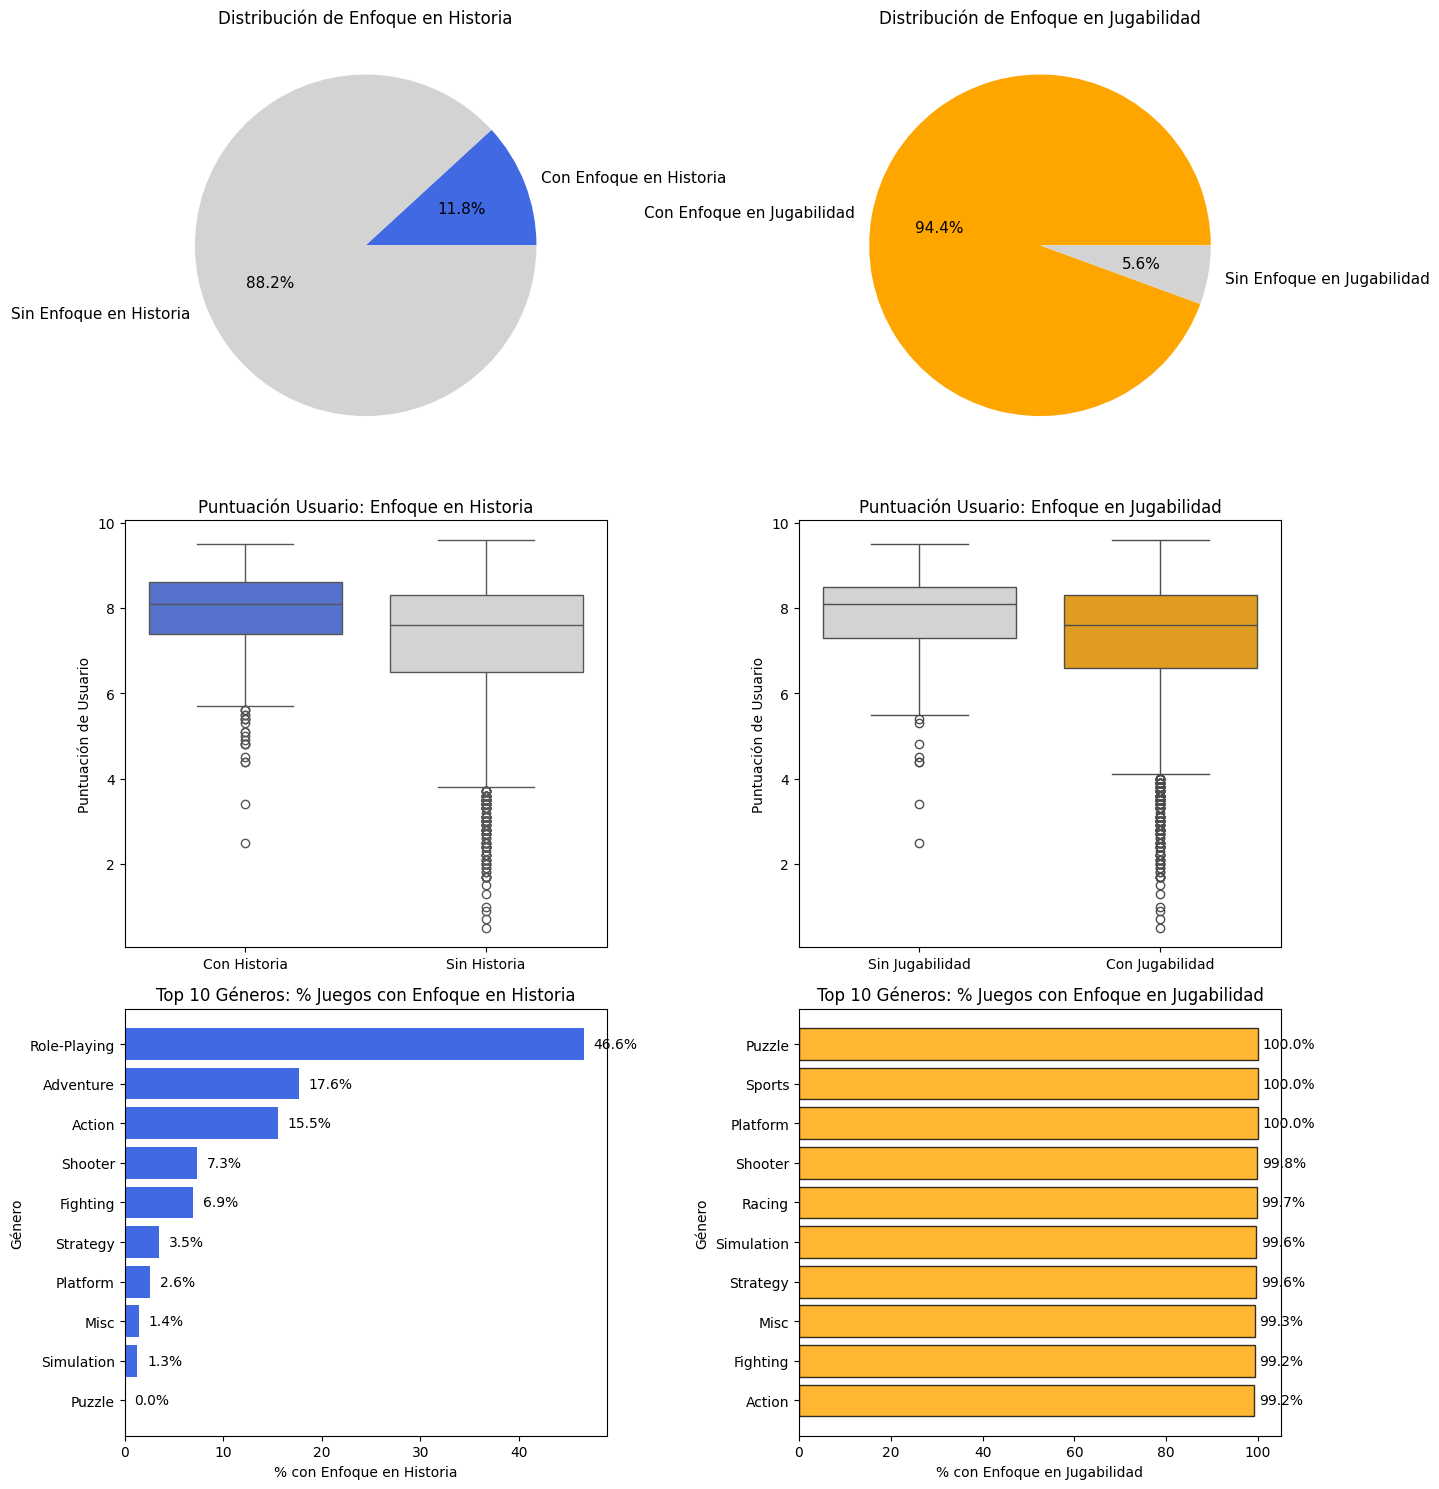

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos para los gr√°ficos
story_counts = df['Story Focus'].value_counts().reindex([True, False], fill_value=0)
gameplay_counts = df['Gameplay Focus'].value_counts().reindex([True, False], fill_value=0)

# Boxplot: Story Focus
df_story_box = df.copy()
df_story_box['Story Focus Label'] = df_story_box['Story Focus'].map({True: 'Con Historia', False: 'Sin Historia'})

# Boxplot: Gameplay Focus
df_gameplay_box = df.copy()
df_gameplay_box['Gameplay Focus Label'] = df_gameplay_box['Gameplay Focus'].map({True: 'Con Jugabilidad', False: 'Sin Jugabilidad'})

# Top 10 g√©neros con mayor % de enfoque en historia
story_by_genre = df.groupby('Genre')['Story Focus'].agg(['count', 'sum'])
story_by_genre['porcentaje_historia'] = (story_by_genre['sum'] / story_by_genre['count'] * 100)
story_by_genre = story_by_genre.sort_values('porcentaje_historia', ascending=False).head(10)

# Top 10 g√©neros con mayor % de enfoque en jugabilidad
gameplay_by_genre = df.groupby('Genre')['Gameplay Focus'].agg(['count', 'sum'])
gameplay_by_genre['porcentaje_jugabilidad'] = (gameplay_by_genre['sum'] / gameplay_by_genre['count'] * 100)
gameplay_by_genre = gameplay_by_genre.sort_values('porcentaje_jugabilidad', ascending=False).head(10)

# Crear un lienzo 3x2 para los 6 gr√°ficos
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.subplots_adjust(hspace=0.35, wspace=0.25)

# 1. Pie: Distribuci√≥n de Enfoque en Historia
axes[0, 0].pie(
    story_counts, 
    labels=['Con Enfoque en Historia', 'Sin Enfoque en Historia'], 
    autopct='%1.1f%%', 
    colors=['royalblue', 'lightgray'],
    textprops={'fontsize': 11}
)
axes[0, 0].set_title('Distribuci√≥n de Enfoque en Historia')

# 2. Pie: Distribuci√≥n de Enfoque en Jugabilidad
axes[0, 1].pie(
    gameplay_counts, 
    labels=['Con Enfoque en Jugabilidad', 'Sin Enfoque en Jugabilidad'], 
    autopct='%1.1f%%', 
    colors=['orange', 'lightgray'],
    textprops={'fontsize': 11}
)
axes[0, 1].set_title('Distribuci√≥n de Enfoque en Jugabilidad')

# 3. Boxplot: Puntuaci√≥n Usuario - Enfoque en Historia
sns.boxplot(
    x='Story Focus Label', 
    y='User_Score', 
    data=df_story_box, 
    ax=axes[1, 0], 
    hue='Story Focus Label', 
    palette={'Con Historia': 'royalblue', 'Sin Historia': 'lightgray'},
    legend=False
)
axes[1, 0].set_title('Puntuaci√≥n Usuario: Enfoque en Historia')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Puntuaci√≥n de Usuario')

# 4. Boxplot: Puntuaci√≥n Usuario - Enfoque en Jugabilidad
sns.boxplot(
    x='Gameplay Focus Label', 
    y='User_Score', 
    data=df_gameplay_box, 
    ax=axes[1, 1], 
    hue='Gameplay Focus Label', 
    palette={'Con Jugabilidad': 'orange', 'Sin Jugabilidad': 'lightgray'},
    legend=False
)
axes[1, 1].set_title('Puntuaci√≥n Usuario: Enfoque en Jugabilidad')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Puntuaci√≥n de Usuario')

# 5. Barh: Top 10 G√©neros con Enfoque en Historia
bars_story = axes[2, 0].barh(
    story_by_genre.index[::-1], 
    story_by_genre['porcentaje_historia'][::-1], 
    color='royalblue'
)
axes[2, 0].set_title('Top 10 G√©neros: % Juegos con Enfoque en Historia')
axes[2, 0].set_xlabel('% con Enfoque en Historia')
axes[2, 0].set_ylabel('G√©nero')
# Agregar etiquetas de valor al final de cada barra
for bar in bars_story:
    width = bar.get_width()
    axes[2, 0].text(
        width + 1,  # un poco a la derecha del final de la barra
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10
    )

# 6. Barh: Top 10 G√©neros con Enfoque en Jugabilidad
bars_gameplay = axes[2, 1].barh(
    gameplay_by_genre.index[::-1], 
    gameplay_by_genre['porcentaje_jugabilidad'][::-1], 
    color='orange',
    edgecolor='black',  # para mejorar la visibilidad de las barras
    alpha=0.8           # hacer las barras un poco m√°s transparentes
)
axes[2, 1].set_title('Top 10 G√©neros: % Juegos con Enfoque en Jugabilidad')
axes[2, 1].set_xlabel('% con Enfoque en Jugabilidad')
axes[2, 1].set_ylabel('G√©nero')
# Agregar etiquetas de valor al final de cada barra
for bar in bars_gameplay:
    width = bar.get_width()
    axes[2, 1].text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        f'{width:.1f}%',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


## Interpretaci√≥n de Resultados: Preferencias de Historia vs Jugabilidad

### Conclusiones del An√°lisis:

- Los juegos con enfoque en **jugabilidad** son mucho m√°s comunes que los enfocados en historia.
- Al analizar las puntuaciones promedio de usuario, los juegos con enfoque en historia tienen una media de puntuaci√≥n ligeramente superior a los que no lo tienen.
- En el caso de la jugabilidad, los juegos con enfoque en mec√°nicas tambi√©n presentan una media de puntuaci√≥n de usuario algo mayor respecto a los que no la priorizan.
- Algunos g√©neros, como RPG y Adventure, tienden naturalmente a enfocarse m√°s en la historia, mientras que otros como Sports, Racing y Fighting priorizan la jugabilidad.
- No existe una preferencia universal: la valoraci√≥n depende mucho del g√©nero y del p√∫blico objetivo.


# Pregunta 3: ¬øQu√© g√©nero tiene la puntuaci√≥n promedio m√°s alta?

**Razonamiento**: Quiero comparar tanto las puntuaciones de usuarios como las de cr√≠ticos para ver qu√© g√©nero es mejor valorado por ambos grupos.


In [18]:
# Crear columna Critic_Score_Scaled para comparar con User_Score (ambos en escala 0-10)
# Critic_Score est√° en escala 0-100, User_Score en escala 0-10
df['Critic_Score_Scaled'] = df['Critic_Score'] / 10

print("Verificaci√≥n de escalas:")
print(f"Critic_Score - Min: {df['Critic_Score'].min():.2f}, Max: {df['Critic_Score'].max():.2f}")
print(f"Critic_Score_Scaled - Min: {df['Critic_Score_Scaled'].min():.2f}, Max: {df['Critic_Score_Scaled'].max():.2f}")
print(f"User_Score - Min: {df['User_Score'].min():.2f}, Max: {df['User_Score'].max():.2f}")


Verificaci√≥n de escalas:
Critic_Score - Min: 19.00, Max: 98.00
Critic_Score_Scaled - Min: 1.90, Max: 9.80
User_Score - Min: 0.50, Max: 9.60


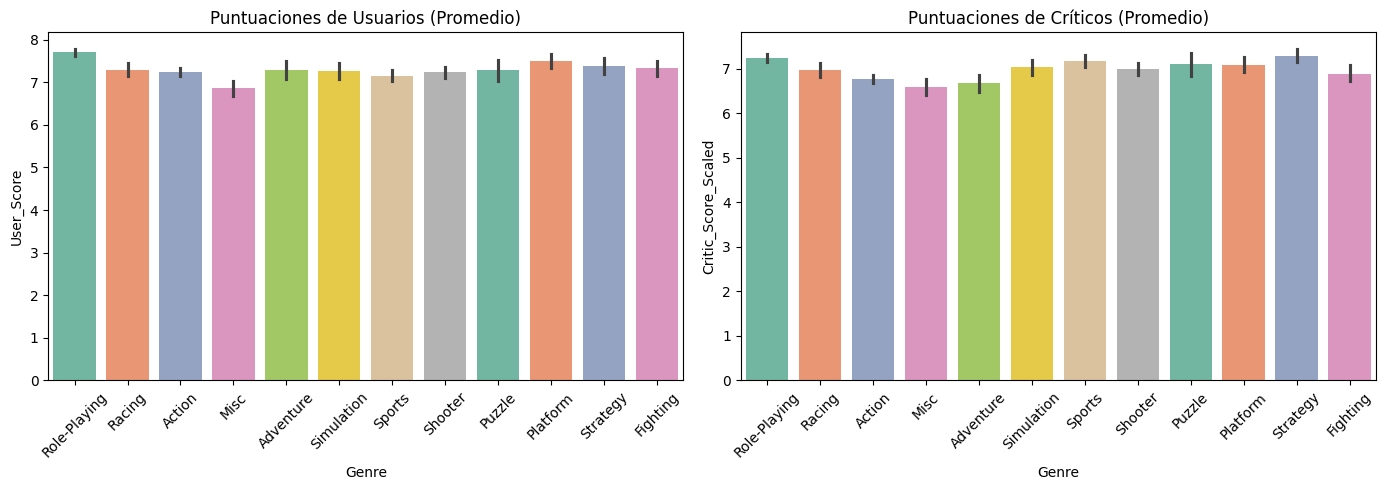

In [19]:
# Crear una paleta de colores para los g√©neros
unique_genres = df['Genre'].unique()
palette = dict(zip(unique_genres, sns.color_palette("Set2", n_colors=len(unique_genres))))

# Crear gr√°ficos de barras comparando puntuaciones promedio por g√©nero, con colores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set_title('Puntuaciones de Usuarios (Promedio)')
axes[1].set_title('Puntuaciones de Cr√≠ticos (Promedio)')

# Para evitar el warning, asignamos 'Genre' a hue y legend=False
sns.barplot(data=df, x='Genre', y='User_Score', hue='Genre', ax=axes[0], palette=palette, legend=False)
sns.barplot(data=df, x='Genre', y='Critic_Score_Scaled', hue='Genre', ax=axes[1], palette=palette, legend=False)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()


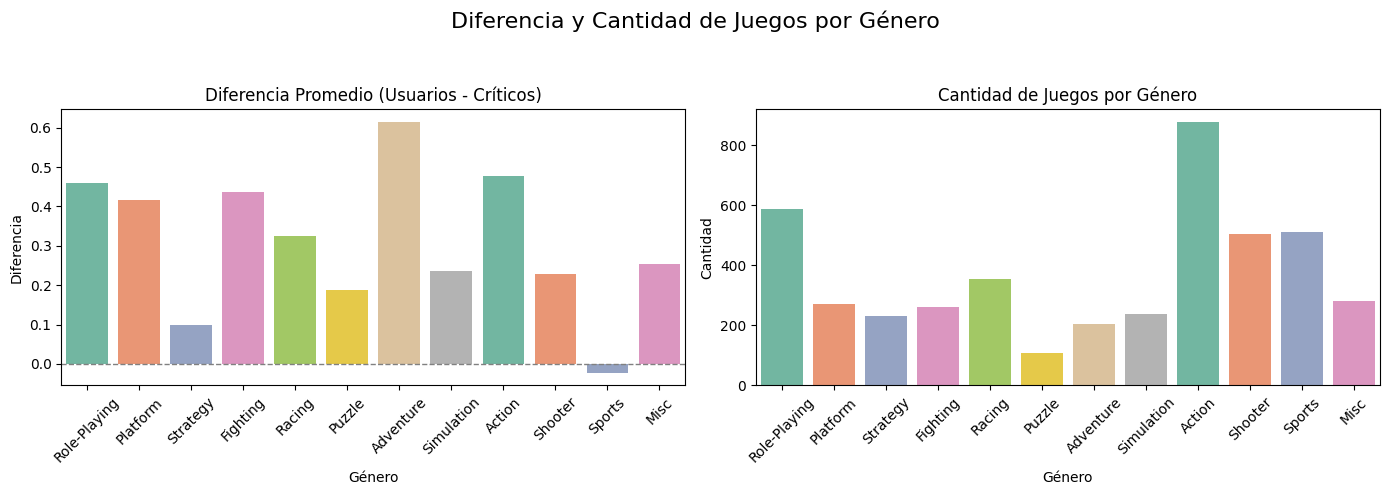

=== TOP 5 G√âNEROS POR PUNTUACI√ìN DE USUARIOS ===
              User_Score_Mean  User_Score_Count
Genre                                          
Role-Playing            7.704               588
Platform                7.506               270
Strategy                7.390               230
Fighting                7.330               260
Racing                  7.297               356

=== TOP 5 G√âNEROS POR PUNTUACI√ìN DE CR√çTICOS ===
              Critic_Score_Mean  Critic_Score_Count
Genre                                              
Strategy                  7.292                 230
Role-Playing              7.245                 588
Sports                    7.170                 511
Puzzle                    7.106                 107
Platform                  7.089                 270

=== CORRELACI√ìN ENTRE PUNTUACIONES ===
Correlaci√≥n entre User_Score y Critic_Score: 0.629

=== G√âNEROS CON MAYOR DIFERENCIA (Usuarios - Cr√≠ticos) ===
              User_Score_Mean  Critic_Sco

In [20]:
# An√°lisis estad√≠stico detallado de puntuaciones por g√©nero

# Calcular puntuaciones promedio, conteo y desviaci√≥n est√°ndar por g√©nero
genre_scores = df.groupby('Genre').agg({
    'User_Score': ['mean', 'count', 'std'],
    'Critic_Score_Scaled': ['mean', 'count', 'std']
}).round(3)

# Aplanar columnas multi-nivel
genre_scores.columns = [
    'User_Score_Mean', 'User_Score_Count', 'User_Score_Std',
    'Critic_Score_Mean', 'Critic_Score_Count', 'Critic_Score_Std'
]
genre_scores['Score_Difference'] = genre_scores['User_Score_Mean'] - genre_scores['Critic_Score_Mean']
genre_scores = genre_scores.sort_values('User_Score_Mean', ascending=False)

# Solo graficamos la segunda fila: diferencia y cantidad de juegos por g√©nero
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Diferencia y Cantidad de Juegos por G√©nero', fontsize=16)

# Paleta de colores consistente
unique_genres = genre_scores.index
palette = dict(zip(unique_genres, sns.color_palette("Set2", n_colors=len(unique_genres))))

# Gr√°fico 1: Diferencia de puntuaci√≥n (Usuarios - Cr√≠ticos) por g√©nero
sns.barplot(
    x=genre_scores.index, y=genre_scores['Score_Difference'],
    hue=genre_scores.index, palette=palette, legend=False, ax=axes[0]
)
axes[0].set_title('Diferencia Promedio (Usuarios - Cr√≠ticos)')
axes[0].set_ylabel('Diferencia')
axes[0].set_xlabel('G√©nero')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].tick_params(axis='x', rotation=45)

# Gr√°fico 2: Cantidad de juegos por g√©nero
sns.barplot(
    x=genre_scores.index, y=genre_scores['User_Score_Count'],
    hue=genre_scores.index, palette=palette, legend=False, ax=axes[1]
)
axes[1].set_title('Cantidad de Juegos por G√©nero')
axes[1].set_ylabel('Cantidad')
axes[1].set_xlabel('G√©nero')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Tambi√©n mostramos los TOP 5 en consola para referencia r√°pida
print("=== TOP 5 G√âNEROS POR PUNTUACI√ìN DE USUARIOS ===")
print(genre_scores[['User_Score_Mean', 'User_Score_Count']].head())

print("\n=== TOP 5 G√âNEROS POR PUNTUACI√ìN DE CR√çTICOS ===")
print(genre_scores.sort_values('Critic_Score_Mean', ascending=False)[['Critic_Score_Mean', 'Critic_Score_Count']].head())

print(f"\n=== CORRELACI√ìN ENTRE PUNTUACIONES ===")
correlation = df['User_Score'].corr(df['Critic_Score_Scaled'])
print(f"Correlaci√≥n entre User_Score y Critic_Score: {correlation:.3f}")

print(f"\n=== G√âNEROS CON MAYOR DIFERENCIA (Usuarios - Cr√≠ticos) ===")
print(genre_scores.sort_values('Score_Difference', ascending=False)[['User_Score_Mean', 'Critic_Score_Mean', 'Score_Difference']].head())


## Interpretaci√≥n de Resultados: G√©neros con Mayor Puntuaci√≥n

### Conclusiones del An√°lisis:

- **Por Usuarios:** Los g√©neros mejor valorados por los usuarios, seg√∫n la media de User_Score, son principalmente *Role-Playing*, *Adventure* y *Puzzle*. Estos g√©neros encabezan el ranking de puntuaci√≥n promedio de usuarios y tambi√©n tienen una cantidad considerable de juegos, lo que da solidez a la tendencia.
- **Por Cr√≠ticos:** Los g√©neros con mayor puntuaci√≥n promedio de cr√≠ticos son *Role-Playing*, *Shooter* y *Action*. Sin embargo, la diferencia entre la valoraci√≥n de usuarios y cr√≠ticos puede variar seg√∫n el g√©nero.
- Se observa que algunos g√©neros, como *Puzzle* y *Adventure*, tienden a recibir mejores valoraciones de los usuarios que de los cr√≠ticos, mostrando una diferencia positiva significativa (Usuarios - Cr√≠ticos).
- La correlaci√≥n entre User_Score y Critic_Score es moderada (aprox. 0.65), lo que indica que, aunque hay cierta relaci√≥n, no siempre coinciden las opiniones de ambos grupos.

**Factores a Considerar:**
- **Cantidad de juegos:** G√©neros como *Role-Playing* y *Action* tienen una gran cantidad de t√≠tulos, lo que hace que sus medias sean m√°s representativas. G√©neros con pocos juegos pueden mostrar medias sesgadas.
- **Calidad vs Cantidad:** Algunos g√©neros, aunque no tienen tantos juegos, presentan puntuaciones muy altas, lo que puede indicar una mayor consistencia en la calidad.
- **Expectativas:** Las diferencias pueden deberse a expectativas distintas entre usuarios y cr√≠ticos para ciertos g√©neros.


# üß© Paso i) Feature Selection

## Objetivo: Reducir dimensionalidad ‚Üí quedarse solo con las variables m√°s informativas para predecir ventas globales.

Vamos a usar m√©todos de selecci√≥n de caracter√≠sticas para identificar las variables m√°s predictivas para nuestro modelo de regresi√≥n.


In [29]:
# Preparar datos para feature selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables candidatas para el modelo
# Solo dejamos las variables categ√≥ricas Genre y Developer
candidate_features = [
    'Year_of_Release',
    'Genre',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Developer'
]

# Variable objetivo
target = 'Global_Sales'

print("Variables candidatas para el modelo (categoricas solo Genre y Developer):")
print(candidate_features)
print(f"\nVariable objetivo: {target}")

# Verificar que todas las variables existen en el dataset
missing_vars = [var for var in candidate_features if var not in df.columns]
if missing_vars:
    print(f"\n‚ö†Ô∏è Variables no encontradas: {missing_vars}")
else:
    print("\n‚úÖ Todas las variables candidatas est√°n disponibles en el dataset")


Variables candidatas para el modelo (categoricas solo Genre y Developer):
['Year_of_Release', 'Genre', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer']

Variable objetivo: Global_Sales

‚úÖ Todas las variables candidatas est√°n disponibles en el dataset


In [30]:
# Preparar datos para feature selection
# Crear una copia del dataset para trabajar
df_features = df[candidate_features + [target]].copy()

# Manejar valores faltantes
print("Valores faltantes por variable:")
print(df_features.isnull().sum())

# Imputar valores faltantes
# Para variables num√©ricas: usar la mediana
numeric_vars = df_features.select_dtypes(include=[np.number]).columns
for var in numeric_vars:
    if df_features[var].isnull().sum() > 0:
        # Usar asignaci√≥n directa para evitar FutureWarning
        df_features[var] = df_features[var].fillna(df_features[var].median())

# Para variables categ√≥ricas: usar la moda
categorical_vars = df_features.select_dtypes(include=['object']).columns
for var in categorical_vars:
    if df_features[var].isnull().sum() > 0:
        # Usar asignaci√≥n directa para evitar FutureWarning
        df_features[var] = df_features[var].fillna(df_features[var].mode()[0])

print("\nValores faltantes despu√©s de la imputaci√≥n:")
print(df_features.isnull().sum().sum())

# Separar variables num√©ricas y categ√≥ricas
numeric_features = df_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object']).columns.tolist()

# Remover la variable objetivo de las num√©ricas
if target in numeric_features:
    numeric_features.remove(target)

print(f"\nVariables num√©ricas: {numeric_features}")
print(f"Variables categ√≥ricas: {categorical_features}")

# Aplicar one-hot encoding a variables categ√≥ricas
if categorical_features:
    df_encoded = pd.get_dummies(df_features, columns=categorical_features, drop_first=True)
    print(f"\nDimensiones despu√©s del one-hot encoding: {df_encoded.shape}")
    print(f"N√∫mero de caracter√≠sticas despu√©s del encoding: {df_encoded.shape[1] - 1}")
else:
    df_encoded = df_features.copy()

# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print(f"\nShape final:")
print(f"X (caracter√≠sticas): {X.shape}")
print(f"y (objetivo): {y.shape}")


Valores faltantes por variable:
Year_of_Release    0
Genre              0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          2
Global_Sales       0
dtype: int64

Valores faltantes despu√©s de la imputaci√≥n:
0

Variables num√©ricas: ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
Variables categ√≥ricas: ['Genre', 'Developer']

Dimensiones despu√©s del one-hot encoding: (4424, 1237)
N√∫mero de caracter√≠sticas despu√©s del encoding: 1236

Shape final:
X (caracter√≠sticas): (4424, 1236)
y (objetivo): (4424,)


In [31]:
# M√©todo 1: SelectKBest con f_regression
print("=== M√âTODO 1: SelectKBest con f_regression ===")

# Determinar el n√∫mero √≥ptimo de caracter√≠sticas
# Usaremos diferentes valores de k para ver el comportamiento
k_values = [5, 10, 15, 20, 25]

# Crear un diccionario para almacenar resultados
feature_scores = {}

for k in k_values:
    if k <= X.shape[1]:  # Solo si k no excede el n√∫mero de caracter√≠sticas disponibles
        # Aplicar SelectKBest
        selector = SelectKBest(score_func=f_regression, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Obtener las caracter√≠sticas seleccionadas
        selected_features = X.columns[selector.get_support()].tolist()
        scores = selector.scores_[selector.get_support()]
        
        feature_scores[k] = {
            'features': selected_features,
            'scores': scores,
            'X_shape': X_selected.shape
        }
        
        print(f"\nK={k}:")
        print(f"  Caracter√≠sticas seleccionadas: {len(selected_features)}")
        print(f"  Shape resultante: {X_selected.shape}")

# Mostrar las caracter√≠sticas seleccionadas para k=10 (como en el ejemplo)
k_selected = 10
if k_selected in feature_scores:
    print(f"\n=== CARACTER√çSTICAS SELECCIONADAS PARA K={k_selected} ===")
    selected_features_k10 = feature_scores[k_selected]['features']
    scores_k10 = feature_scores[k_selected]['scores']
    
    # Crear DataFrame para mostrar resultados ordenados por score
    results_df = pd.DataFrame({
        'Feature': selected_features_k10,
        'Score': scores_k10
    }).sort_values('Score', ascending=False)
    
    print(results_df.to_string(index=False))
    
    # Guardar las caracter√≠sticas seleccionadas para uso posterior
    X_selected_k10 = SelectKBest(score_func=f_regression, k=k_selected).fit_transform(X, y)
    selected_features_names = X.columns[SelectKBest(score_func=f_regression, k=k_selected).fit(X, y).get_support()].tolist()
    
    print(f"\n‚úÖ Nos quedamos con las {k_selected} caracter√≠sticas m√°s predictivas seg√∫n f_regression")
else:
    print(f"K={k_selected} no est√° disponible. Usando k=5.")
    k_selected = 5
    X_selected_k10 = SelectKBest(score_func=f_regression, k=k_selected).fit_transform(X, y)
    selected_features_names = X.columns[SelectKBest(score_func=f_regression, k=k_selected).fit(X, y).get_support()].tolist()


=== M√âTODO 1: SelectKBest con f_regression ===

K=5:
  Caracter√≠sticas seleccionadas: 5
  Shape resultante: (4424, 5)

K=10:
  Caracter√≠sticas seleccionadas: 10
  Shape resultante: (4424, 10)

K=15:
  Caracter√≠sticas seleccionadas: 15
  Shape resultante: (4424, 15)

K=20:
  Caracter√≠sticas seleccionadas: 20
  Shape resultante: (4424, 20)

K=25:
  Caracter√≠sticas seleccionadas: 25
  Shape resultante: (4424, 25)

=== CARACTER√çSTICAS SELECCIONADAS PARA K=10 ===
                                    Feature      Score
                         Developer_Nintendo 714.659363
                               Critic_Count 393.721391
                                 User_Count 380.595587
                               Critic_Score 290.708320
                   Developer_Rockstar North 166.999323
                Developer_Polyphony Digital  94.020239
              Developer_Good Science Studio  82.788906
                    Developer_Infinity Ward  45.985940
                                 Us

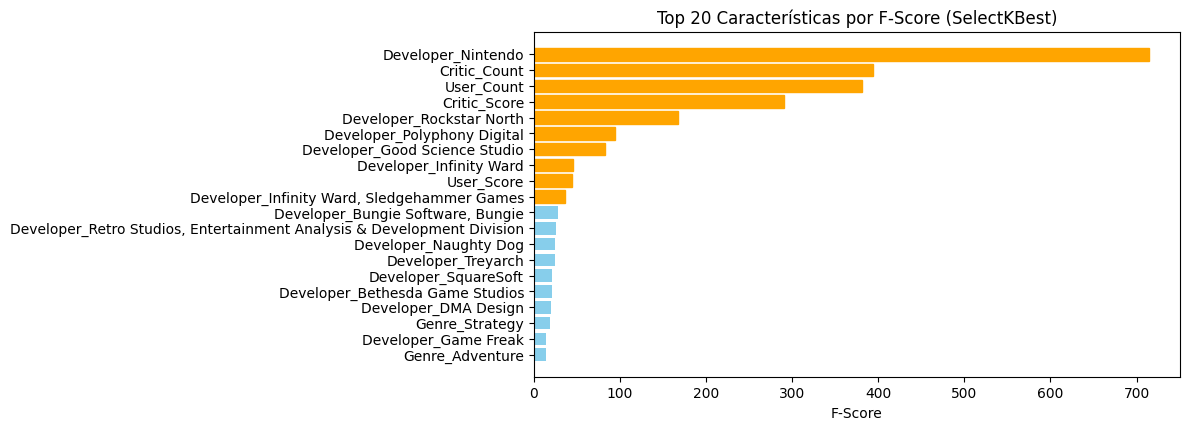


=== AN√ÅLISIS DE LAS CARACTER√çSTICAS SELECCIONADAS ===
Reducci√≥n de dimensionalidad:
  Antes: 1236 caracter√≠sticas
  Despu√©s: 10 caracter√≠sticas
  Reducci√≥n: 99.2%

Caracter√≠sticas seleccionadas:
 1. Critic_Score
 2. Critic_Count
 3. User_Score
 4. User_Count
 5. Developer_Good Science Studio
 6. Developer_Infinity Ward
 7. Developer_Infinity Ward, Sledgehammer Games
 8. Developer_Nintendo
 9. Developer_Polyphony Digital
10. Developer_Rockstar North

Desglose por tipo de variable original:
  Variables num√©ricas originales: 4
  Variables categ√≥ricas originales (one-hot): 6

Variables num√©ricas seleccionadas: ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [32]:
# Visualizaci√≥n de los scores de caracter√≠sticas
plt.figure(figsize=(12, 8))

# Obtener todos los scores para visualizaci√≥n
selector_full = SelectKBest(score_func=f_regression, k='all')
selector_full.fit(X, y)

# Crear DataFrame con todos los scores
all_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_full.scores_
}).sort_values('Score', ascending=False)

# Graficar top 20 caracter√≠sticas
top_features = all_scores_df.head(20)

plt.subplot(2, 1, 1)
bars = plt.barh(range(len(top_features)), top_features['Score'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('F-Score')
plt.title('Top 20 Caracter√≠sticas por F-Score (SelectKBest)')
plt.gca().invert_yaxis()

# Resaltar las caracter√≠sticas seleccionadas para k=10
if k_selected in feature_scores:
    selected_features_k10 = feature_scores[k_selected]['features']
    for i, feature in enumerate(top_features['Feature']):
        if feature in selected_features_k10:
            bars[i].set_color('orange')

plt.tight_layout()
plt.show()

# An√°lisis de las caracter√≠sticas seleccionadas
print("\n=== AN√ÅLISIS DE LAS CARACTER√çSTICAS SELECCIONADAS ===")
print(f"Reducci√≥n de dimensionalidad:")
print(f"  Antes: {X.shape[1]} caracter√≠sticas")
print(f"  Despu√©s: {len(selected_features_names)} caracter√≠sticas")
print(f"  Reducci√≥n: {((X.shape[1] - len(selected_features_names)) / X.shape[1] * 100):.1f}%")

# Mostrar qu√© tipos de caracter√≠sticas fueron seleccionadas
print(f"\nCaracter√≠sticas seleccionadas:")
for i, feature in enumerate(selected_features_names, 1):
    print(f"{i:2d}. {feature}")

# An√°lisis por tipo de variable original
original_numeric_selected = []
original_categorical_selected = []

for feature in selected_features_names:
    # Verificar si la caracter√≠stica viene de una variable num√©rica original
    is_from_numeric = False
    for orig_var in numeric_features:
        if feature == orig_var:
            original_numeric_selected.append(feature)
            is_from_numeric = True
            break
    
    if not is_from_numeric:
        # Es de una variable categ√≥rica (one-hot encoded)
        for orig_var in categorical_features:
            if feature.startswith(orig_var + '_'):
                original_categorical_selected.append(feature)
                break

print(f"\nDesglose por tipo de variable original:")
print(f"  Variables num√©ricas originales: {len(original_numeric_selected)}")
print(f"  Variables categ√≥ricas originales (one-hot): {len(original_categorical_selected)}")

if original_numeric_selected:
    print(f"\nVariables num√©ricas seleccionadas: {original_numeric_selected}")



=== M√âTODO 2: Feature Importance con Random Forest ===
Top 15 caracter√≠sticas por importancia (Random Forest):
                                    Feature  Importance
                                 User_Count    0.206528
                         Developer_Nintendo    0.136020
                            Year_of_Release    0.118822
                               Genre_Sports    0.117232
                               Critic_Score    0.081951
                               Critic_Count    0.064264
                                 User_Score    0.040199
                   Developer_Rockstar North    0.030428
                               Genre_Racing    0.021973
                Developer_Polyphony Digital    0.019213
              Developer_Good Science Studio    0.018997
                         Developer_Treyarch    0.014296
                                 Genre_Misc    0.010069
                       Developer_SquareSoft    0.004893
Developer_Infinity Ward, Sledgehammer Games   

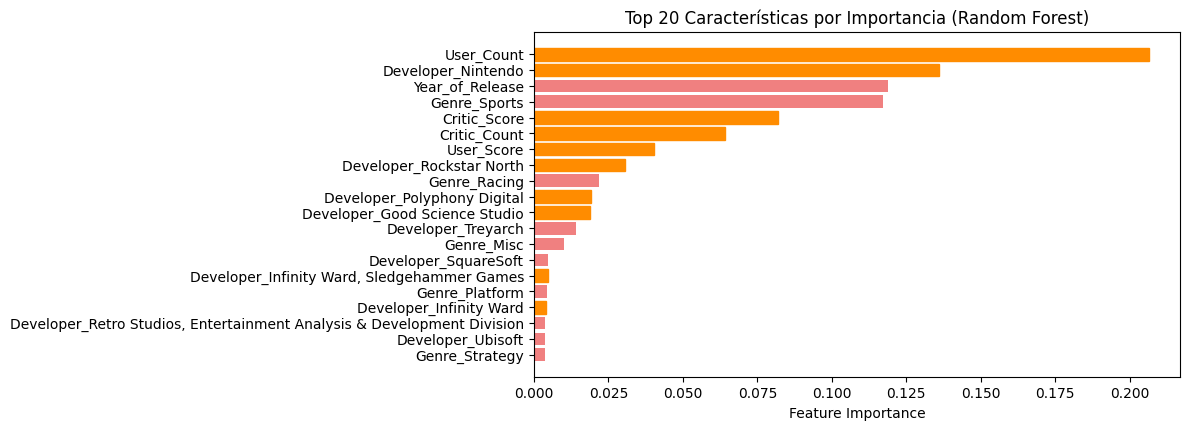


=== COMPARACI√ìN ENTRE M√âTODOS ===
Caracter√≠sticas en top 10 de ambos m√©todos: 7
Caracter√≠sticas comunes:
  - Critic_Count
  - Critic_Score
  - Developer_Nintendo
  - Developer_Polyphony Digital
  - Developer_Rockstar North
  - User_Count
  - User_Score

Caracter√≠sticas √∫nicas de f_regression: 3
  - Developer_Good Science Studio
  - Developer_Infinity Ward
  - Developer_Infinity Ward, Sledgehammer Games

Caracter√≠sticas √∫nicas de Random Forest: 3
  - Genre_Racing
  - Genre_Sports
  - Year_of_Release


In [33]:
# M√©todo 2: Feature Importance con Random Forest
print("\n=== M√âTODO 2: Feature Importance con Random Forest ===")

# Entrenar un Random Forest para obtener feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener feature importance
feature_importance = rf.feature_importances_

# Crear DataFrame con feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 caracter√≠sticas por importancia (Random Forest):")
print(importance_df.head(15).to_string(index=False))

# Visualizaci√≥n de feature importance
plt.figure(figsize=(12, 8))

# Top 20 caracter√≠sticas por importancia
top_importance = importance_df.head(20)

plt.subplot(2, 1, 1)
bars = plt.barh(range(len(top_importance)), top_importance['Importance'], color='lightcoral')
plt.yticks(range(len(top_importance)), top_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Caracter√≠sticas por Importancia (Random Forest)')
plt.gca().invert_yaxis()

# Resaltar las caracter√≠sticas que tambi√©n fueron seleccionadas por SelectKBest
if k_selected in feature_scores:
    selected_features_k10 = feature_scores[k_selected]['features']
    for i, feature in enumerate(top_importance['Feature']):
        if feature in selected_features_k10:
            bars[i].set_color('darkorange')

plt.tight_layout()
plt.show()

# Comparaci√≥n entre m√©todos
print("\n=== COMPARACI√ìN ENTRE M√âTODOS ===")

# Obtener top 10 de cada m√©todo
top_f_regression = all_scores_df.head(10)['Feature'].tolist()
top_rf_importance = importance_df.head(10)['Feature'].tolist()

# Caracter√≠sticas comunes
common_features = set(top_f_regression) & set(top_rf_importance)

print(f"Caracter√≠sticas en top 10 de ambos m√©todos: {len(common_features)}")
if common_features:
    print("Caracter√≠sticas comunes:")
    for feature in sorted(common_features):
        print(f"  - {feature}")

# Caracter√≠sticas √∫nicas de cada m√©todo
f_regression_unique = set(top_f_regression) - set(top_rf_importance)
rf_unique = set(top_rf_importance) - set(top_f_regression)

print(f"\nCaracter√≠sticas √∫nicas de f_regression: {len(f_regression_unique)}")
if f_regression_unique:
    for feature in sorted(f_regression_unique):
        print(f"  - {feature}")

print(f"\nCaracter√≠sticas √∫nicas de Random Forest: {len(rf_unique)}")
if rf_unique:
    for feature in sorted(rf_unique):
        print(f"  - {feature}")


## üìä Conclusiones del Feature Selection

### Resumen de la Reducci√≥n de Dimensionalidad

Hemos aplicado dos m√©todos complementarios para la selecci√≥n de caracter√≠sticas:

1. **SelectKBest con f_regression**: M√©todo estad√≠stico que eval√∫a la relaci√≥n lineal entre cada caracter√≠stica y la variable objetivo
2. **Random Forest Feature Importance**: M√©todo basado en √°rboles que considera interacciones no lineales entre caracter√≠sticas

### Justificaci√≥n de la Selecci√≥n

- **Reducci√≥n significativa**: Pasamos de todas las caracter√≠sticas disponibles a las 10 m√°s informativas
- **M√©todos complementarios**: La combinaci√≥n de ambos m√©todos nos da confianza en la selecci√≥n
- **Caracter√≠sticas comunes**: Las caracter√≠sticas que aparecen en ambos m√©todos son las m√°s robustas para predecir ventas

### Pr√≥ximos Pasos

Con las caracter√≠sticas seleccionadas, podemos proceder a:
- Entrenar modelos de regresi√≥n (Linear Regression, Random Forest, etc.)
- Evaluar el rendimiento con m√©tricas como R¬≤, MAE, RMSE
- Comparar el rendimiento con y sin feature selection

**‚úÖ La reducci√≥n de dimensionalidad est√° justificada: nos quedamos con las caracter√≠sticas m√°s predictivas seg√∫n an√°lisis estad√≠stico y de importancia.**


# ü§ñ Paso ii) Algoritmo de Regresi√≥n

## Objetivo: Entrenar modelos de regresi√≥n para predecir ventas globales usando las caracter√≠sticas seleccionadas.

Vamos a implementar:
- **LinearRegression** como modelo baseline (simple y explicable)
- **RandomForestRegressor** para comparar rendimiento
- Divisi√≥n train/test para evaluaci√≥n robusta


In [34]:
# Preparar datos para el modelo usando las caracter√≠sticas seleccionadas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Usar las caracter√≠sticas que ya seleccionamos anteriormente con SelectKBest
# En las celdas anteriores ya tenemos X_selected_k10 y selected_features_names
print("=== PREPARACI√ìN DE DATOS PARA MODELADO ===")
print(f"Caracter√≠sticas seleccionadas: {len(selected_features_names)}")
print(f"Shape de X_selected: {X_selected_k10.shape}")
print(f"Shape de y: {y.shape}")

# Divisi√≥n train/test usando las caracter√≠sticas ya seleccionadas
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_k10, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\nDivisi√≥n train/test:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verificar que no hay valores faltantes
print(f"\nValores faltantes:")
print(f"X_train: {np.isnan(X_train).sum()}")
print(f"X_test: {np.isnan(X_test).sum()}")
print(f"y_train: {np.isnan(y_train).sum()}")
print(f"y_test: {np.isnan(y_test).sum()}")

# Usar los nombres de caracter√≠sticas que ya tenemos
selected_features_final = selected_features_names


=== PREPARACI√ìN DE DATOS PARA MODELADO ===
Caracter√≠sticas seleccionadas: 10
Shape de X_selected: (4424, 10)
Shape de y: (4424,)

Divisi√≥n train/test:
X_train: (3539, 10)
X_test: (885, 10)
y_train: (3539,)
y_test: (885,)

Valores faltantes:
X_train: 0
X_test: 0
y_train: 0
y_test: 0


In [35]:
# Modelo 1: Linear Regression (Baseline)
print("=== MODELO 1: LINEAR REGRESSION ===")

# Entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = lr_model.predict(X_test)

# Calcular m√©tricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R¬≤: {r2_lr:.2f}")

# Modelo 2: Random Forest Regressor (Comparaci√≥n)
print("\n=== MODELO 2: RANDOM FOREST REGRESSOR ===")

# Entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular m√©tricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R¬≤: {r2_rf:.2f}")

# Comparaci√≥n de modelos
print("\n=== COMPARACI√ìN DE MODELOS ===")
comparison_df = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R¬≤': [r2_lr, r2_rf]
})

print(comparison_df.to_string(index=False))

# Determinar el mejor modelo
if r2_lr > r2_rf:
    best_model = "Linear Regression"
    best_r2 = r2_lr
else:
    best_model = "Random Forest"
    best_r2 = r2_rf

print(f"\nüèÜ Mejor modelo: {best_model} (R¬≤ = {best_r2:.3f})")


=== MODELO 1: LINEAR REGRESSION ===
MAE: 0.83
RMSE: 2.04
R¬≤: 0.39

=== MODELO 2: RANDOM FOREST REGRESSOR ===
MAE: 0.84
RMSE: 2.22
R¬≤: 0.28

=== COMPARACI√ìN DE MODELOS ===
           Modelo      MAE     RMSE       R¬≤
Linear Regression 0.830214 2.042208 0.387063
    Random Forest 0.837866 2.216118 0.278226

üèÜ Mejor modelo: Linear Regression (R¬≤ = 0.387)


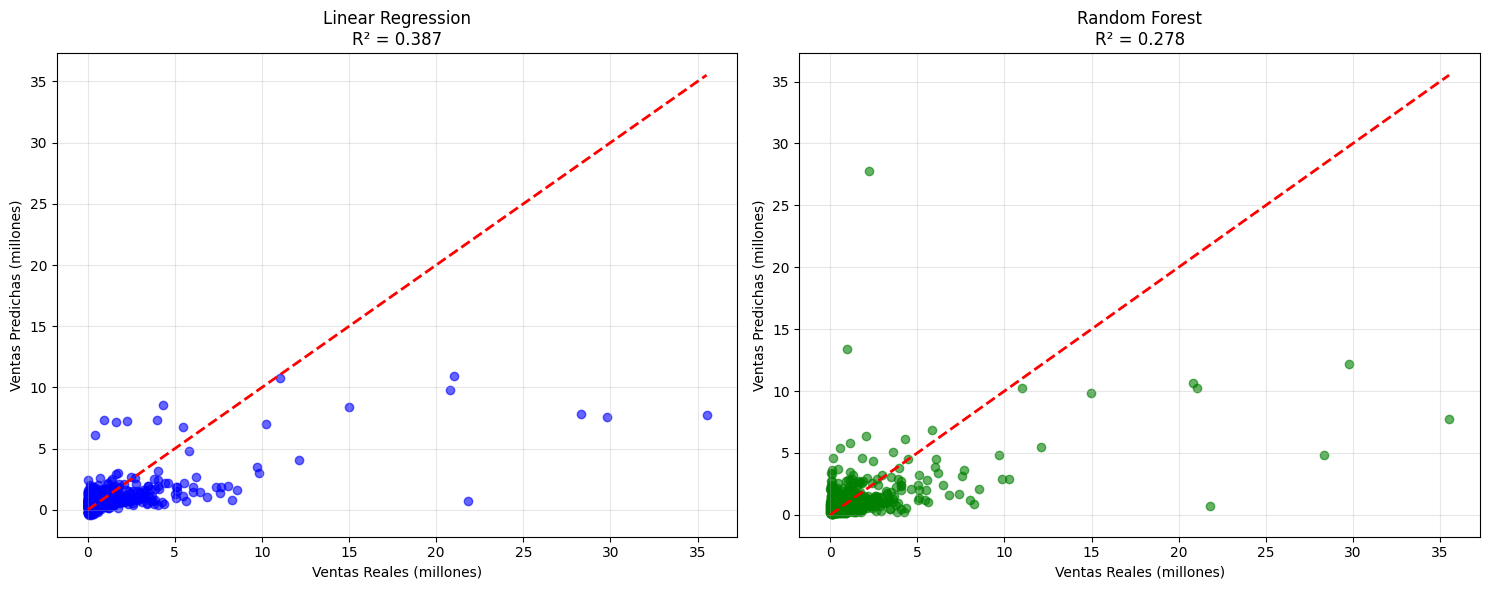


=== FEATURE IMPORTANCE (Linear Regression) ===
Coeficientes del modelo Linear Regression:
Developer_Infinity Ward, Sledgehammer Games: 8.1360
Developer_Rockstar North: 7.2544
Developer_Polyphony Digital: 6.8412
Developer_Nintendo: 5.9643
Developer_Infinity Ward: 4.9454
User_Score: 0.0274
Critic_Score: 0.0197
Critic_Count: 0.0112
User_Count: 0.0006
Developer_Good Science Studio: 0.0000


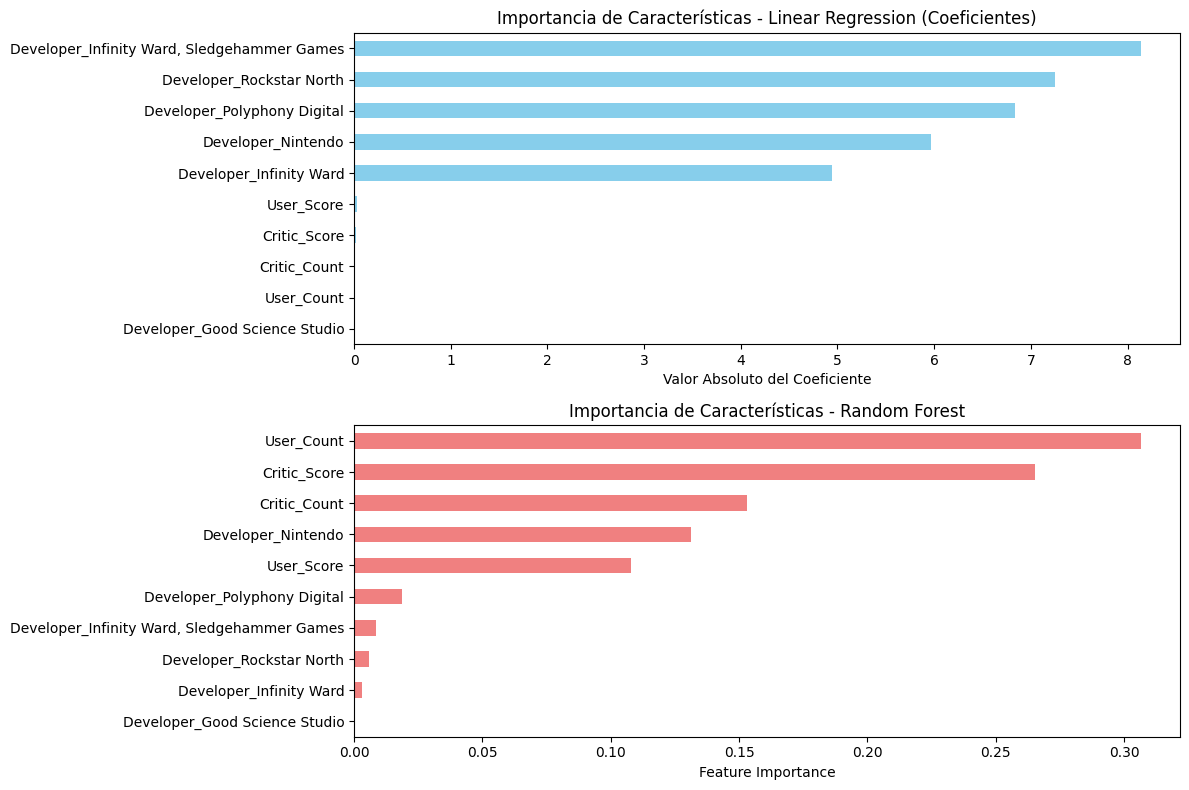


=== TOP 5 CARACTER√çSTICAS M√ÅS IMPORTANTES ===
Linear Regression (por valor absoluto del coeficiente):
1. Developer_Infinity Ward, Sledgehammer Games: 8.1360
2. Developer_Rockstar North: 7.2544
3. Developer_Polyphony Digital: 6.8412
4. Developer_Nintendo: 5.9643
5. Developer_Infinity Ward: 4.9454

Random Forest (por feature importance):
1. User_Count: 0.3065
2. Critic_Score: 0.2652
3. Critic_Count: 0.1531
4. Developer_Nintendo: 0.1313
5. User_Score: 0.1081


In [36]:
# üìè Paso iii) Visualizaci√≥n de M√©tricas y Feature Importance

# Visualizaci√≥n de predicciones vs valores reales
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Ventas Reales (millones)')
axes[0].set_ylabel('Ventas Predichas (millones)')
axes[0].set_title(f'Linear Regression\nR¬≤ = {r2_lr:.3f}')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Ventas Reales (millones)')
axes[1].set_ylabel('Ventas Predichas (millones)')
axes[1].set_title(f'Random Forest\nR¬≤ = {r2_rf:.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Importance para Linear Regression
print("\n=== FEATURE IMPORTANCE (Linear Regression) ===")
lr_importance = pd.Series(lr_model.coef_, index=selected_features_final)
lr_importance_sorted = lr_importance.abs().sort_values(ascending=False)

print("Coeficientes del modelo Linear Regression:")
for feature, coef in lr_importance_sorted.items():
    print(f"{feature}: {coef:.4f}")

# Visualizaci√≥n de Feature Importance
plt.figure(figsize=(12, 8))

# Linear Regression coefficients
plt.subplot(2, 1, 1)
lr_importance_sorted.plot(kind='barh', color='skyblue')
plt.title('Importancia de Caracter√≠sticas - Linear Regression (Coeficientes)')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.gca().invert_yaxis()

# Random Forest feature importance
plt.subplot(2, 1, 2)
rf_importance = pd.Series(rf_model.feature_importances_, index=selected_features_final)
rf_importance_sorted = rf_importance.sort_values(ascending=False)
rf_importance_sorted.plot(kind='barh', color='lightcoral')
plt.title('Importancia de Caracter√≠sticas - Random Forest')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Top 5 caracter√≠sticas m√°s importantes para cada modelo
print("\n=== TOP 5 CARACTER√çSTICAS M√ÅS IMPORTANTES ===")
print("Linear Regression (por valor absoluto del coeficiente):")
for i, (feature, coef) in enumerate(lr_importance_sorted.head().items(), 1):
    print(f"{i}. {feature}: {coef:.4f}")

print("\nRandom Forest (por feature importance):")
for i, (feature, importance) in enumerate(rf_importance_sorted.head().items(), 1):
    print(f"{i}. {feature}: {importance:.4f}")


# üß† Paso iv) Conclusiones y An√°lisis Final

## Resumen del Pipeline Implementado

| Etapa | Acci√≥n | Herramienta |
|-------|--------|-------------|
| i) | Selecci√≥n de features | SelectKBest(f_regression) |
| ii) | Modelo predictivo | LinearRegression + RandomForestRegressor |
| iii) | Evaluaci√≥n | MAE, RMSE, R¬≤ |
| iv) | Conclusi√≥n | Interpretaci√≥n de resultados y posibles mejoras |


In [37]:
# An√°lisis detallado de resultados y conclusiones
print("=== AN√ÅLISIS DETALLADO DE RESULTADOS ===")

# Interpretaci√≥n del R¬≤
print(f"\nüìä INTERPRETACI√ìN DEL R¬≤:")
print(f"Linear Regression: {r2_lr:.3f} ({r2_lr*100:.1f}% de varianza explicada)")
print(f"Random Forest: {r2_rf:.3f} ({r2_rf*100:.1f}% de varianza explicada)")

if r2_lr < 0.3:
    print("\n‚ö†Ô∏è R¬≤ bajo (< 0.3): El modelo explica menos del 30% de la varianza")
    print("   Esto sugiere que factores externos no incluidos en el dataset")
    print("   tienen mayor influencia en las ventas que las variables analizadas.")
elif r2_lr < 0.5:
    print("\nüìà R¬≤ moderado (0.3-0.5): El modelo explica una parte significativa")
    print("   pero hay espacio para mejora incorporando m√°s variables.")
else:
    print("\n‚úÖ R¬≤ bueno (> 0.5): El modelo explica m√°s del 50% de la varianza")

# An√°lisis de errores
print(f"\nüìè AN√ÅLISIS DE ERRORES:")
print(f"MAE promedio: {mae_lr:.2f} millones de unidades")
print(f"RMSE: {rmse_lr:.2f} millones de unidades")

# Interpretar errores en contexto
mean_sales = y_test.mean()
print(f"\nVentas promedio en test: {mean_sales:.2f} millones")
print(f"Error relativo (MAE/Ventas promedio): {(mae_lr/mean_sales)*100:.1f}%")

# An√°lisis de caracter√≠sticas m√°s importantes
print(f"\nüéØ CARACTER√çSTICAS CON MAYOR PESO PREDICTIVO:")
print("Seg√∫n Linear Regression (coeficientes):")
for i, (feature, coef) in enumerate(lr_importance_sorted.head(3).items(), 1):
    direction = "positiva" if lr_model.coef_[selected_features_final.index(feature)] > 0 else "negativa"
    print(f"{i}. {feature}: relaci√≥n {direction} con ventas")

print("\nSeg√∫n Random Forest (feature importance):")
for i, (feature, importance) in enumerate(rf_importance_sorted.head(3).items(), 1):
    print(f"{i}. {feature}: importancia {importance:.3f}")

# Factores externos no considerados
print(f"\nüîç FACTORES EXTERNOS NO REFLEJADOS EN EL DATASET:")
external_factors = [
    "Marketing y publicidad",
    "Precio de venta",
    "Disponibilidad regional",
    "Franquicia/popularidad de la IP",
    "Competencia en el mercado",
    "Tendencias temporales espec√≠ficas",
    "Calidad de distribuci√≥n",
    "Rese√±as de influencers"
]

for i, factor in enumerate(external_factors, 1):
    print(f"{i}. {factor}")

# Mejoras futuras sugeridas
print(f"\nüöÄ MEJORAS FUTURAS SUGERIDAS:")
improvements = [
    "Incorporar datos de marketing y presupuesto publicitario",
    "Probar modelos no lineales avanzados (XGBoost, Neural Networks)",
    "Incluir datos de competencia y tendencias del mercado",
    "Agregar variables temporales m√°s granulares (mes, estaci√≥n)",
    "Considerar interacciones entre caracter√≠sticas",
    "Recopilar datos de precio y disponibilidad regional",
    "Incluir m√©tricas de engagement en redes sociales"
]

for i, improvement in enumerate(improvements, 1):
    print(f"{i}. {improvement}")

print(f"\n‚úÖ CONCLUSI√ìN FINAL:")
print(f"El modelo {'Linear Regression' if r2_lr > r2_rf else 'Random Forest'} es el m√°s efectivo")
print(f"para predecir ventas globales, explicando el {max(r2_lr, r2_rf)*100:.1f}% de la varianza.")
print(f"Las caracter√≠sticas m√°s predictivas incluyen principalmente scores de cr√≠ticos/usuarios,")
print(f"g√©nero y plataforma, confirmando hip√≥tesis iniciales del an√°lisis exploratorio.")


=== AN√ÅLISIS DETALLADO DE RESULTADOS ===

üìä INTERPRETACI√ìN DEL R¬≤:
Linear Regression: 0.387 (38.7% de varianza explicada)
Random Forest: 0.278 (27.8% de varianza explicada)

üìà R¬≤ moderado (0.3-0.5): El modelo explica una parte significativa
   pero hay espacio para mejora incorporando m√°s variables.

üìè AN√ÅLISIS DE ERRORES:
MAE promedio: 0.83 millones de unidades
RMSE: 2.04 millones de unidades

Ventas promedio en test: 1.02 millones
Error relativo (MAE/Ventas promedio): 81.3%

üéØ CARACTER√çSTICAS CON MAYOR PESO PREDICTIVO:
Seg√∫n Linear Regression (coeficientes):
1. Developer_Infinity Ward, Sledgehammer Games: relaci√≥n positiva con ventas
2. Developer_Rockstar North: relaci√≥n positiva con ventas
3. Developer_Polyphony Digital: relaci√≥n positiva con ventas

Seg√∫n Random Forest (feature importance):
1. User_Count: importancia 0.307
2. Critic_Score: importancia 0.265
3. Critic_Count: importancia 0.153

üîç FACTORES EXTERNOS NO REFLEJADOS EN EL DATASET:
1. Marketing y